In [30]:
import plotly.express as px
import plotly.graph_objects as go
import torch
import pandas as pd
import numpy as np

In [35]:
high_d_base_dir = '../../_results/logs/runs/debug_high_depthloss/20230505-192714/'
depth_gt_high_d = torch.load(high_d_base_dir + '100_ep_gt_depth.pt').cpu().detach().numpy()
depth_pred_high_d = torch.load(high_d_base_dir + '100_ep_pred_depth.pt').cpu().detach().numpy()
depth_gt_weight_high_d = torch.load(high_d_base_dir + '100_ep_error_depth.pt').cpu().detach().numpy()
df_high_d = pd.DataFrame({'pred':depth_pred_high_d, 'gt': depth_gt_high_d, 'gt_weight': depth_gt_weight_high_d})
df_high_d_concatenated = pd.DataFrame({
    'depth':np.concatenate([depth_pred_high_d, depth_gt_high_d]),
    'is_gt': np.concatenate([np.zeros(depth_pred_high_d.shape), np.ones(depth_gt_high_d.shape)]),
    'gt_weight': np.concatenate([depth_gt_weight_high_d, depth_gt_weight_high_d])})


no_d_base_dir = '../../_results/logs/runs/debug/20230505-120159/'
depth_gt_no_d = torch.load(no_d_base_dir + '100_ep_gt_depth.pt').cpu().detach().numpy()
depth_pred_no_d = torch.load(no_d_base_dir + '100_ep_pred_depth.pt').cpu().detach().numpy()
df_no_d = pd.DataFrame({'pred':depth_pred_no_d, 'gt': depth_gt_no_d})

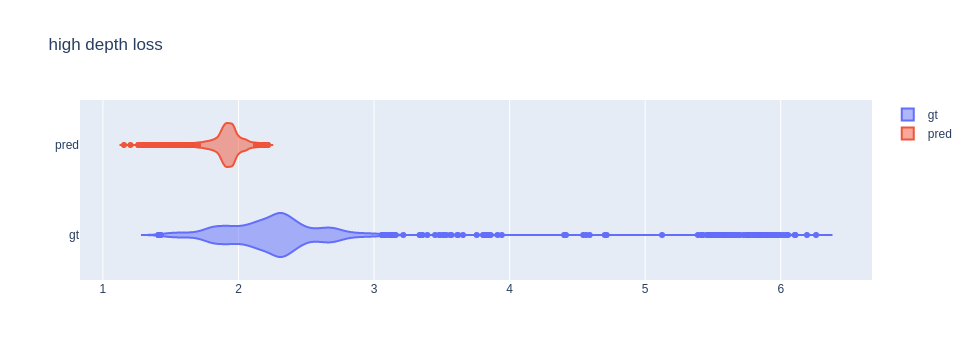

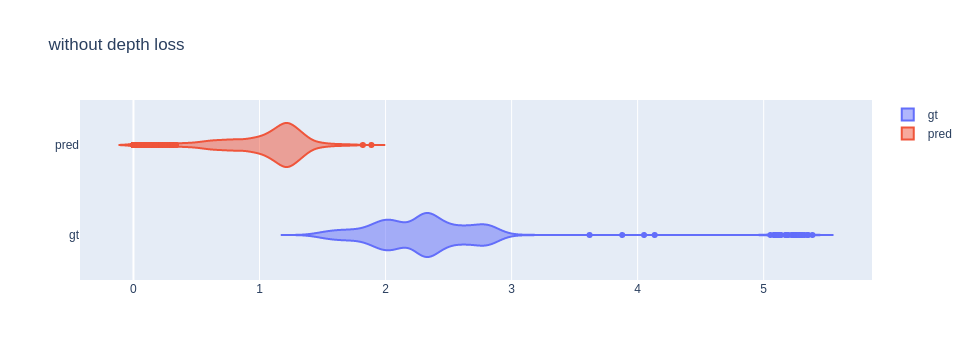

In [24]:
fig = go.Figure()
fig.add_trace(go.Violin(x=depth_gt_high_d, name='gt'))
fig.add_trace(go.Violin(x=depth_pred_high_d, name='pred'))
fig.update_layout(title_text='high depth loss')
fig.show()
                  
fig = go.Figure()
fig.add_trace(go.Violin(x=depth_gt_no_d, name='gt'))
fig.add_trace(go.Violin(x=depth_pred_no_d, name='pred'))
fig.update_layout(title_text='without depth loss')
fig.show()

In [37]:
# px.strip(df_high_d_concatenated, x='is_gt', y='depth', color='gt_weight').show()
# px.scatter(df_high_d, x='gt', color='gt_weight').show()
# px.scatter(df_high_d, x='pred', color='gt_weight')

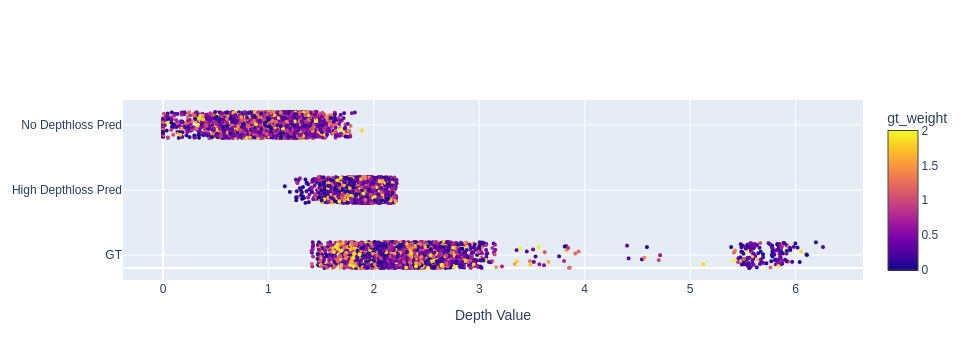

In [66]:
fig = go.Figure()
N = len(df_high_d['gt'])
fig.add_trace(go.Scatter(x=df_high_d['gt'],
                         y=0 + np.random.rand(N) * 0.2,
                             mode='markers',
                         marker=dict(size=4,
        color=df_high_d['gt_weight'],
                                     colorbar=dict(title='gt_weight'),
                                    colorscale='Plasma')
        , name='gt',
                        ))
fig.add_trace(go.Scatter(x=df_high_d['pred'],
                         y=0.5 + np.random.rand(N) * 0.2,
                             mode='markers',
                         marker=dict(
        size=4,
        color=df_high_d['gt_weight'],
                         colorscale='Plasma')
        , name='high depthloss pred'))
fig.add_trace(go.Scatter(x=df_no_d['pred'],
                         y=1 + np.random.rand(N) * 0.2,
                             mode='markers',
                         marker=dict(
        size=4,
        color=df_high_d['gt_weight'],
                         colorscale='Plasma')
        , name='no depthloss pred'))
fig.update_layout(showlegend=False, coloraxis_showscale=True, xaxis_title='Depth Value')
fig.update_yaxes(tickvals=[0.1,0.6, 1.1], ticktext=['GT','High Depthloss Pred', 'No Depthloss Pred'])
fig.show()
fig.write_html("depth_distributions.html")